<a href="https://colab.research.google.com/github/BharathraajNagarajan/rawml-diabetes-predictor/blob/main/rawml_diabetes_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from scipy.optimize import minimize
from scipy.io import loadmat
from numpy.linalg import det, inv
from math import sqrt, pi
import scipy.io
import matplotlib.pyplot as plt
import pickle
import sys

In [ ]:
def ldaLearn(X,y):
    # Inputs
    # X - a N x d matrix with each row corresponding to a training example
    # y - a N x 1 column vector indicating the labels for each training example
    #
    # Outputs
    # means - A d x k matrix containing learnt means for each of the k classes
    # covmat - A single d x d learnt covariance matrix

    # IMPLEMENT THIS METHOD
    classes = np.unique(y)
    d = X.shape[1]
    means = np.zeros((d, len(classes)))
    for i, c in enumerate(classes):
        Xc = X[y.flatten() == c]
        means[:, i] = np.mean(Xc, axis=0)
    covmat = np.cov(X.T, bias=True)
    return means, covmat

def qdaLearn(X,y):
    # Inputs
    # X - a N x d matrix with each row corresponding to a training example
    # y - a N x 1 column vector indicating the labels for each training example
    #
    # Outputs
    # means - A d x k matrix containing learnt means for each of the k classes
    # covmats - A list of k d x d learnt covariance matrices for each of the k classes

    # IMPLEMENT THIS METHOD
    classes = np.unique(y)
    d = X.shape[1]
    means = np.zeros((d, len(classes)))
    covmats = []
    for i, c in enumerate(classes):
        Xc = X[y.flatten() == c]
        means[:, i] = np.mean(Xc, axis=0)
        covmats.append(np.cov(Xc.T, bias=True))
    return means, covmats

def ldaTest(means,covmat,Xtest,ytest):
    # Inputs
    # means, covmat - parameters of the LDA model
    # Xtest - a N x d matrix with each row corresponding to a test example
    # ytest - a N x 1 column vector indicating the labels for each test example
    # Outputs
    # acc - A scalar accuracy value
    # ypred - N x 1 column vector indicating the predicted labels

    # IMPLEMENT THIS METHOD
    inv_covmat = inv(covmat)
    ypred = np.zeros((Xtest.shape[0], 1))
    for i in range(Xtest.shape[0]):
        distances = []
        for j in range(means.shape[1]):
            diff = Xtest[i] - means[:, j]
            dist = diff.T @ inv_covmat @ diff
            distances.append(dist)
        ypred[i] = np.argmin(distances) + 1
    acc = np.mean(ypred == ytest)
    return acc,ypred

def qdaTest(means,covmats,Xtest,ytest):
    # Inputs
    # means, covmats - parameters of the QDA model
    # Xtest - a N x d matrix with each row corresponding to a test example
    # ytest - a N x 1 column vector indicating the labels for each test example
    # Outputs
    # acc - A scalar accuracy value
    # ypred - N x 1 column vector indicating the predicted labels

    # IMPLEMENT THIS METHOD
    ypred = np.zeros((Xtest.shape[0], 1))
    for i in range(Xtest.shape[0]):
        distances = []
        for j in range(means.shape[1]):
            diff = Xtest[i] - means[:, j]
            inv_cov = inv(covmats[j])
            term = diff.T @ inv_cov @ diff
            distances.append(term + np.log(det(covmats[j])))
        ypred[i] = np.argmin(distances) + 1
    acc = np.mean(ypred == ytest)
    return acc, ypred

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving sample.pickle to sample (1).pickle


LDA Accuracy = 0.97
QDA Accuracy = 0.96


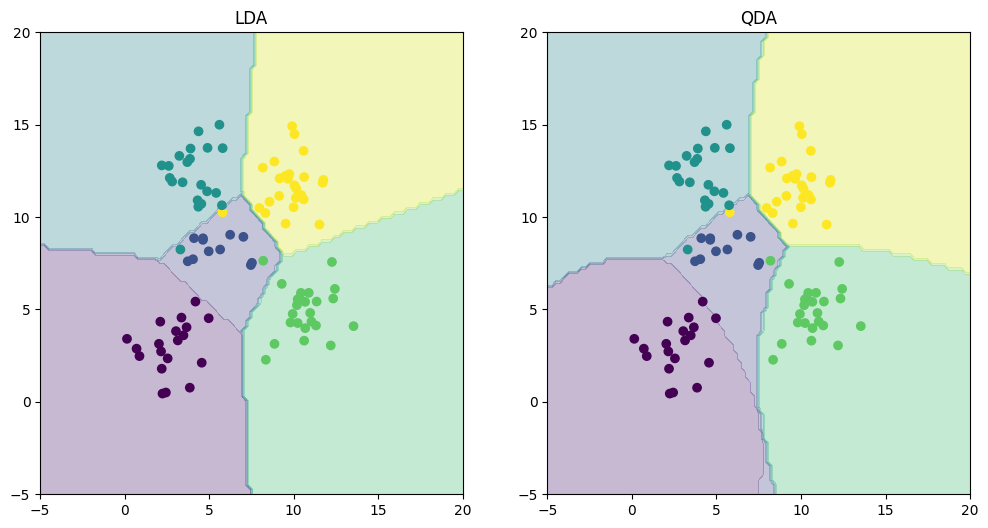

In [ ]:
# Main script

# Problem 1
# load the sample data
if sys.version_info.major == 2:
    X,y,Xtest,ytest = pickle.load(open('sample.pickle','rb'))
else:
    X,y,Xtest,ytest = pickle.load(open('sample.pickle','rb'),encoding = 'latin1')

# LDA
means,covmat = ldaLearn(X,y)
ldaacc,ldares = ldaTest(means,covmat,Xtest,ytest)
print('LDA Accuracy = '+str(ldaacc))
# QDA
means,covmats = qdaLearn(X,y)
qdaacc,qdares = qdaTest(means,covmats,Xtest,ytest)
print('QDA Accuracy = '+str(qdaacc))

# plotting boundaries
x1 = np.linspace(-5,20,100)
x2 = np.linspace(-5,20,100)
xx1,xx2 = np.meshgrid(x1,x2)
xx = np.zeros((x1.shape[0]*x2.shape[0],2))
xx[:,0] = xx1.ravel()
xx[:,1] = xx2.ravel()

fig = plt.figure(figsize=[12,6])
plt.subplot(1, 2, 1)

zacc,zldares = ldaTest(means,covmat,xx,np.zeros((xx.shape[0],1)))
plt.contourf(x1,x2,zldares.reshape((x1.shape[0],x2.shape[0])),alpha=0.3)
plt.scatter(Xtest[:,0],Xtest[:,1],c=ytest)
plt.title('LDA')

plt.subplot(1, 2, 2)

zacc,zqdares = qdaTest(means,covmats,xx,np.zeros((xx.shape[0],1)))
plt.contourf(x1,x2,zqdares.reshape((x1.shape[0],x2.shape[0])),alpha=0.3)
plt.scatter(Xtest[:,0],Xtest[:,1],c=ytest)
plt.title('QDA')

plt.show()

In [ ]:
def learnOLERegression(X,y):
    # Inputs:
    # X = N x d
    # y = N x 1
    # Output:
    # w = d x 1

    # IMPLEMENT THIS METHOD
    w = np.linalg.inv(X.T @ X) @ X.T @ y
    return w

def testOLERegression(w,Xtest,ytest):
    # Inputs:
    # w = d x 1
    # Xtest = N x d
    # ytest = X x 1
    # Output:
    # mse

    # IMPLEMENT THIS METHOD
    N = Xtest.shape[0]
    predictions = Xtest @ w
    mse = np.sum((ytest - predictions) ** 2) / N
    return mse

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving diabetes.pickle to diabetes.pickle


In [ ]:
# Problem 2
if sys.version_info.major == 2:
    X,y,Xtest,ytest = pickle.load(open('diabetes.pickle','rb'))
else:
    X,y,Xtest,ytest = pickle.load(open('diabetes.pickle','rb'),encoding = 'latin1')

# add intercept
X_i = np.concatenate((np.ones((X.shape[0],1)), X), axis=1)
Xtest_i = np.concatenate((np.ones((Xtest.shape[0],1)), Xtest), axis=1)

w = learnOLERegression(X,y)
mle = testOLERegression(w,Xtest,ytest)

w_i = learnOLERegression(X_i,y)
mle_i = testOLERegression(w_i,Xtest_i,ytest)

print('MSE without intercept '+str(mle))
print('MSE with intercept '+str(mle_i))

MSE without intercept 106775.36156418786
MSE with intercept 3707.8401812458424


In [ ]:
def learnRidgeRegression(X,y,lambd):
    # Inputs:
    # X = N x d
    # y = N x 1
    # lambd = ridge parameter (scalar)
    # Output:
    # w = d x 1

    # IMPLEMENT THIS METHOD
    d = X.shape[1]
    I = np.identity(d)
    w = np.linalg.inv(X.T @ X + lambd * I) @ X.T @ y

    return w


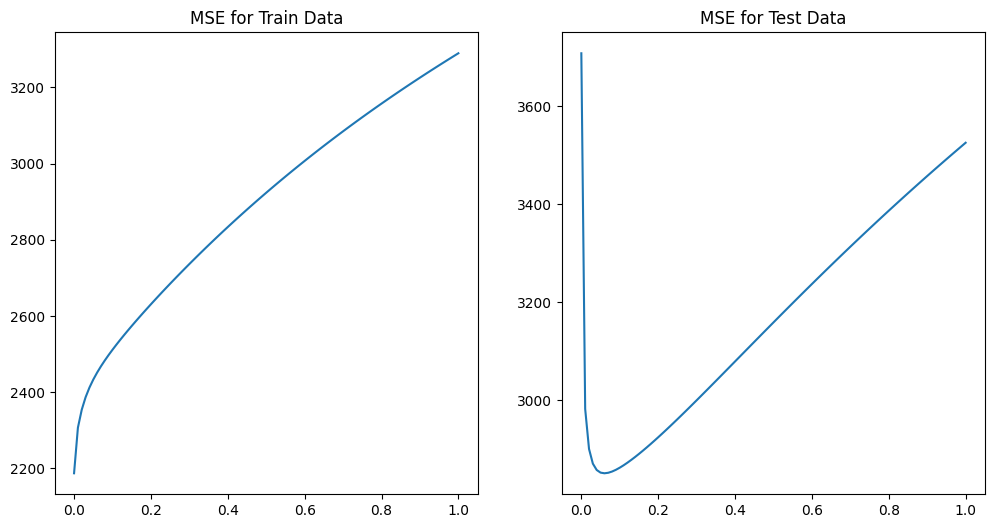

Optimal λ = 0.06


In [ ]:
# Problem 3
k = 101
lambdas = np.linspace(0, 1, num=k)
i = 0
mses3_train = np.zeros((k,1))
mses3 = np.zeros((k,1))
for lambd in lambdas:
    w_l = learnRidgeRegression(X_i,y,lambd)
    mses3_train[i] = testOLERegression(w_l,X_i,y)
    mses3[i] = testOLERegression(w_l,Xtest_i,ytest)
    i = i + 1
fig = plt.figure(figsize=[12,6])
plt.subplot(1, 2, 1)
plt.plot(lambdas,mses3_train)
plt.title('MSE for Train Data')
plt.subplot(1, 2, 2)
plt.plot(lambdas,mses3)
plt.title('MSE for Test Data')

plt.show()

lambda_opt = lambdas[np.argmin(mses3)]
print("Optimal λ =", lambda_opt)

In [ ]:
def regressionObjVal(w, X, y, lambd):

    # compute squared error (scalar) and gradient of squared error with respect
    # to w (vector) for the given data X and y and the regularization parameter
    # lambda

    # IMPLEMENT THIS METHOD
    w = np.atleast_1d(w).reshape(-1, 1)
    error = 0.5 * ((y - X @ w).T @ (y - X @ w)) + 0.5 * lambd * (w.T @ w)
    error_grad = -X.T @ (y - X @ w) + lambd * w
    return error.flatten(), error_grad.flatten()

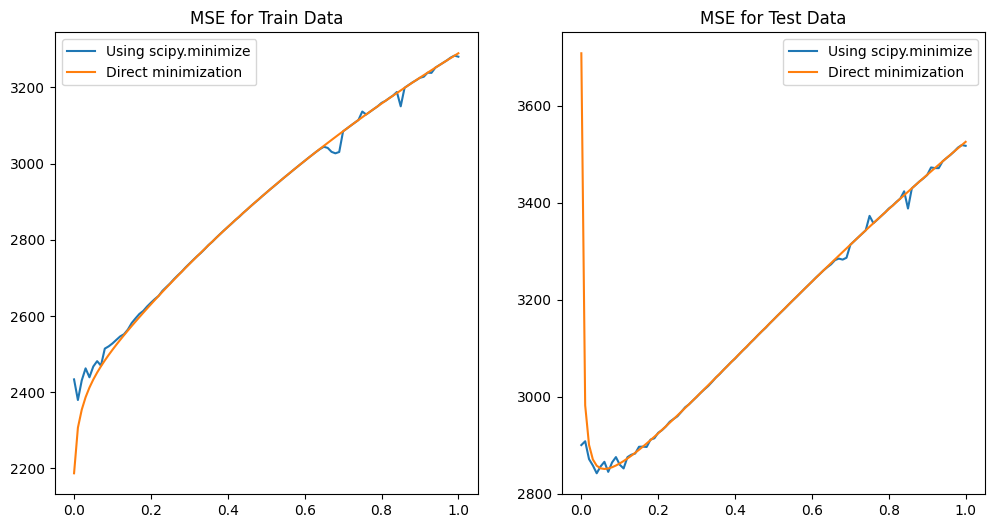

In [ ]:
# Problem 4
k = 101
lambdas = np.linspace(0, 1, num=k)
i = 0
mses4_train = np.zeros((k,1))
mses4 = np.zeros((k,1))
opts = {'maxiter' : 20}    # Preferred value.
w_init = np.ones((X_i.shape[1]))
for lambd in lambdas:
    args = (X_i, y, lambd)
    w_l = minimize(regressionObjVal, w_init, jac=True, args=args,method='CG', options=opts)
    w_l = np.transpose(np.array(w_l.x))
    w_l = np.reshape(w_l,[len(w_l),1])
    mses4_train[i] = testOLERegression(w_l,X_i,y)
    mses4[i] = testOLERegression(w_l,Xtest_i,ytest)
    i = i + 1
fig = plt.figure(figsize=[12,6])
plt.subplot(1, 2, 1)
plt.plot(lambdas,mses4_train)
plt.plot(lambdas,mses3_train)
plt.title('MSE for Train Data')
plt.legend(['Using scipy.minimize','Direct minimization'])

plt.subplot(1, 2, 2)
plt.plot(lambdas,mses4)
plt.plot(lambdas,mses3)
plt.title('MSE for Test Data')
plt.legend(['Using scipy.minimize','Direct minimization'])
plt.show()


In [ ]:
def mapNonLinear(x,p):
    # Inputs:
    # x - a single column vector (N x 1)
    # p - integer (>= 0)
    # Outputs:
    # Xp - (N x (p+1))

    # IMPLEMENT THIS METHOD
    x = x.flatten()  # ensure it's 1D
    N = x.shape[0]
    Xp = np.ones((N, p + 1))
    for i in range(1, p + 1):
        Xp[:, i] = x ** i
    return Xp

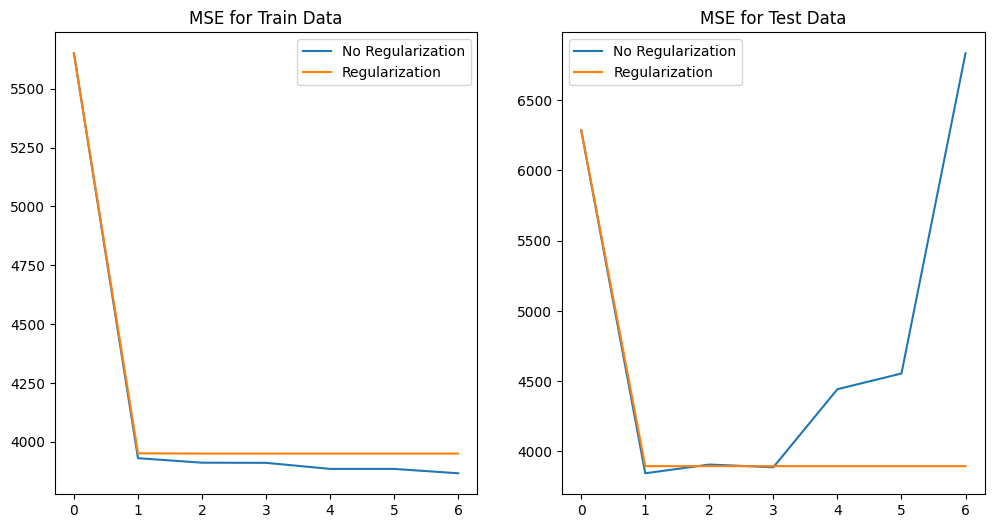

In [ ]:
# Problem 5
pmax = 7
lambda_opt = 0.06
mses5_train = np.zeros((pmax,2))
mses5 = np.zeros((pmax,2))
for p in range(pmax):
    Xd = mapNonLinear(X[:,2],p)
    Xdtest = mapNonLinear(Xtest[:,2],p)
    w_d1 = learnRidgeRegression(Xd,y,0)
    mses5_train[p,0] = testOLERegression(w_d1,Xd,y)
    mses5[p,0] = testOLERegression(w_d1,Xdtest,ytest)
    w_d2 = learnRidgeRegression(Xd,y,lambda_opt)
    mses5_train[p,1] = testOLERegression(w_d2,Xd,y)
    mses5[p,1] = testOLERegression(w_d2,Xdtest,ytest)

fig = plt.figure(figsize=[12,6])
plt.subplot(1, 2, 1)
plt.plot(range(pmax),mses5_train)
plt.title('MSE for Train Data')
plt.legend(('No Regularization','Regularization'))
plt.subplot(1, 2, 2)
plt.plot(range(pmax),mses5)
plt.title('MSE for Test Data')
plt.legend(('No Regularization','Regularization'))
plt.show()